In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=8
paper='1106.6060'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: {{DOCSTRING}}

The following function is already defined in the library HF.py. So you don't need to defined them if you need them.

def flattened(ham: np.ndarray, N_flavor, N_k: int):
    """Flattens a Hamiltonian or expectation value tensor from high-rank to rank-3.

    Args:
      ham: Hamiltonian or expectation value tensor with shape (*N_flavor, *N_flavor, N_k).
      N_flavor: Tuple or

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

I need to analyze the Hamiltonian equation and identify all the components for the Hartree-Fock method implementation. Let's break down the problem step by step.

First, let's understand the Hamiltonian structure:

The Hamiltonian is given as:
\begin{equation}
  \HH_{\rm MF} = \sum_{\kk, s} \hat{C}^{\dag}_{\kk s}\HH_{\kk s}\hat{C}^{\phantom{\dag}}_{\kk s} + f(n^{p}, \eta)
\end{equation}

Where $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$ is a vector of creation operators for three different orbitals (x, y, d) with momentum k and spin s.

The Hamiltonian matrix $\HH_{\kk s}$ is a 3×3 matrix with elements that depend on various parameters and functions of k.

The function $f(n^{p}, \eta)$ contains additional terms related to interactions.

### QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, we have:
- Spin index s (which is typically ↑, ↓, so |spin| = 2)
- Orbi

In [7]:
print(generated_code['thinking'])

I need to analyze the Hamiltonian equation and identify all the components for the Hartree-Fock method implementation. Let's break down the problem step by step.

First, let's understand the Hamiltonian structure:

The Hamiltonian is given as:
\begin{equation}
  \HH_{\rm MF} = \sum_{\kk, s} \hat{C}^{\dag}_{\kk s}\HH_{\kk s}\hat{C}^{\phantom{\dag}}_{\kk s} + f(n^{p}, \eta)
\end{equation}

Where $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$ is a vector of creation operators for three different orbitals (x, y, d) with momentum k and spin s.

The Hamiltonian matrix $\HH_{\kk s}$ is a 3×3 matrix with elements that depend on various parameters and functions of k.

The function $f(n^{p}, \eta)$ contains additional terms related to interactions.

### QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, we have:
- Spin index s (which is typically ↑, ↓, so |spin| = 2)
- Orbital flavor index (x, y, d, so |orbital_flavor| = 3)
-

In [8]:
print(generated_code['text'])

# QUESTION 1: Dimension and Basis Order

Tuple of Flavors (D) = (2, 3)
Basis Order:
0: spin. Order: up, down
1: orbital_flavor. Order: x, y, d

# QUESTION 2: Identifying Interacting Terms

EXP-VAL DEPENDENT TERMS: {
    "n^p": "Sum of exp_val for px and py orbitals across both spins",
    "eta": "Difference between px and py orbital occupations",
    "n": "Total sum of all occupations"
}

TERMS:
- $\xi_{x}$ depends on $n^p$ and $\eta$ → H[s, 0, s, 0, k], I
- $\xi_{y}$ depends on $n^p$ and $\eta$ → H[s, 1, s, 1, k], I
- $\xi_{d}$ depends on $n$ and $n^p$ → H[s, 2, s, 2, k], I
- $\gamma_1(k_i)$ and $\gamma_2(\kk)$ are fixed functions of k → Off-diagonal elements, NI
- $f(n^{p}, \eta)$ is an additional constant term dependent on $n^p$ and $\eta$ → I

# QUESTION 3: Class Implementation

```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a three-orbital model (px, py, d) with spin.
    
    The Hamilto

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a three-orbital model (px, py, d) with spin.
    
    The Hamiltonian describes a system with px, py, and d orbitals on a square lattice
    with both on-site and inter-site interactions.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor for the system.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={'Delta': 0.0, 't_pd': 1.0, 't_pp': 0.5, 'U_p': 1.0, 'V_pp': 0.5, 'V_pd': 0.5, 'U_d': 1.0, 'T': 0, 'a': 1.0}, filling_factor: float=0.5):
        self.lattice = 'square'   # Lattice symmetry
        self.D = (2, 3)  # Number of flavors: (spin, orbital)
        self.basis_order = {'0': 'spin', '1': 'orbital_flavor'}
        # Order for each flavor:
        # 0: spin up, spin down
        # 1: 

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1106_6060_8.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

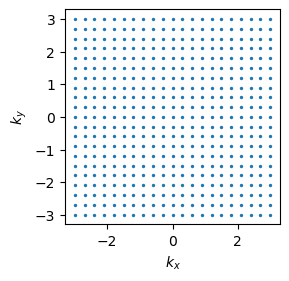

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

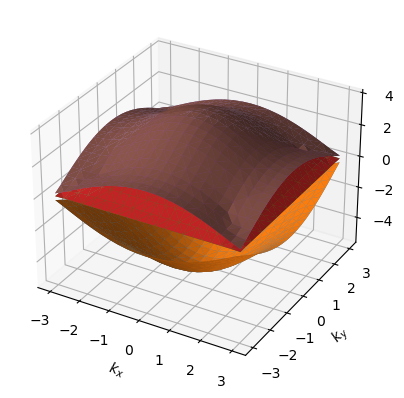

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

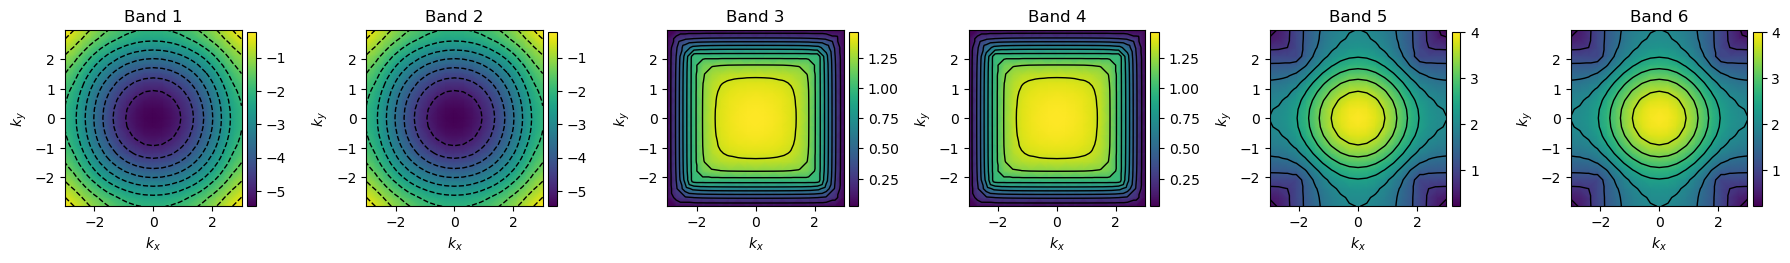

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 1


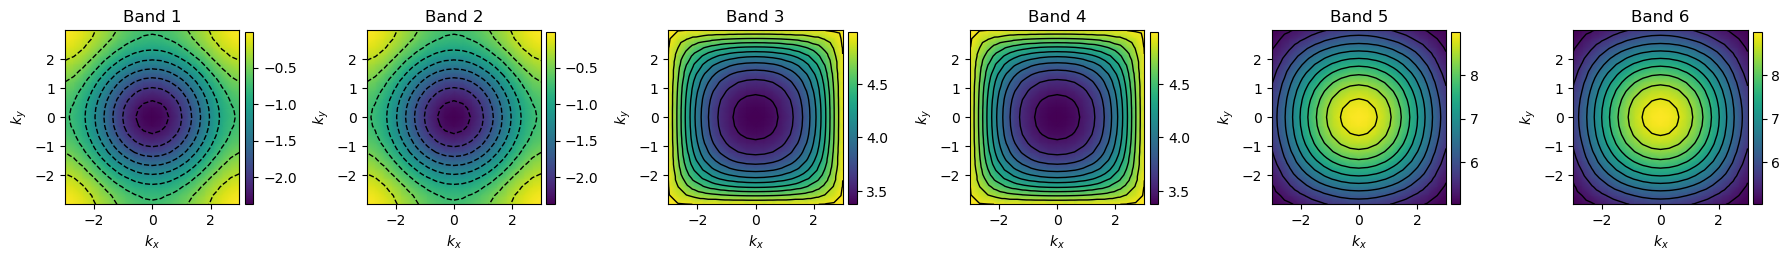

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[:,2,:,2,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 2


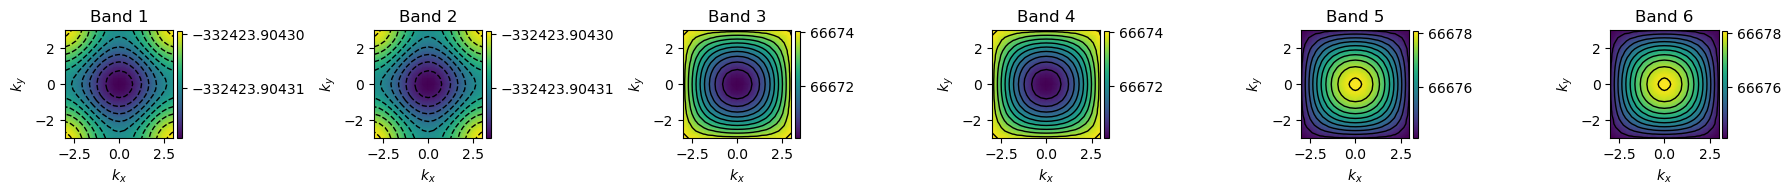

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 399093.97
U/T is 18950.47
mean_U is 19314.79


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze this image based on the rubric provided, which asks me to check if the image shows a momentum space mesh in the first Brillouin zone and to verify the point group symmetry.

First, let's examine what the image shows:
- The image displays a grid of blue dots in a square region
- The horizontal axis is labeled as k_x, ranging from approximately -3 to 3
- The vertical axis is labeled as k_y, ranging from approximately -3 to 3
- The dots form a uniform, evenly-spaced grid throughout this square region

For a square lattice (as specified in the problem), the first Brillouin zone is indeed a square in momentum space. So the representation appears to be consistent with a square lattice.

Now, let's check the specific points from the rubric:

1. **Momentum space mesh in the first Brillouin zone**: 
The image shows a momentum space mesh represented by the grid of blue dots. For a square lattice, the first Brillouin zone is a sq

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

I'll analyze the band structure images based on the provided rubric.

1. First, I need to identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square lattice.

Looking at the plots, I can see that the Brillouin zone shown is square-shaped in all bands, with $k_x$ and $k_y$ both ranging approximately from -3 to 3. The square boundary is consistent with what is expected for a square lattice, as mentioned in the problem. So this point is correct.

2. Next, I'll examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
- In Bands 1 and 2: The highest energy regions (yellows) are at the corners of the Brillouin zone.
- In Bands 3 and 4: The highest energy regions (yellows) are in the central square region.
- In Bands 5 and 6: The highest energy regions (yellows) are at the center of the Brillouin zone.

2.2 Trace the pattern o

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image according to the rubric.

The image shows 6 different bands (Band 1 through Band 6) displayed as false color plots in the first Brillouin zone. These appear to be the results of a Hartree-Fock calculation of an interacting system on a square lattice.

Going through the rubric points:

1. **Brillouin zone shape**: 
   Looking at all the plots, I can see that the Brillouin zone is clearly square-shaped, with boundaries at approximately kx = ±π and ky = ±π (shown as ±2 in the plots). This matches the expected Brillouin zone for a square lattice, so this criterion is satisfied.

2. **Symmetry of energy distribution**:

   2.1 **Highest energy regions (yellow)**:
   - Bands 1 & 2: The highest energy regions are at the corners of the Brillouin zone
   - Bands 3 & 4: The highest energy regions are at the corners of the Brillouin zone
   - Bands 5 & 6: The highest energy regions are at the center of the Brillouin zon

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='4*V_pd = 4e5')
    )


#################### THINKING ####################

I'm looking at the image provided, which shows a series of false color plots for 6 different energy bands in the Brillouin zone.

Let me follow the rubric step by step:

1. Identify the shape of the Brillouin zone boundary:
The plots show the Brillouin zone from approximately -2.5 to 2.5 in both kx and ky directions. The boundary forms a square, which is indeed expected for a square lattice. So this point is correct.

2. Examine the symmetry of the energy distribution:

2.1 Highest energy regions (yellow):
- In Bands 1-4, the highest energy regions are at the corners of the shown region.
- In Bands 5-6, the highest energy regions are concentrated at the center.

2.2 Pattern of energy variation:
- Bands 1-2: Show concentric patterns decreasing from the edges toward the center
- Bands 3-4: Show concentric patterns decreasing from the edges toward the center
- Bands 5-6: Show concentric patterns increasing from the edges toward the cent

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '8' saved to final_answer.yaml
